In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_list = ['Iris_results',
                'Blood_Transfusion_results',
                'Vertebral-Column_results',
                'Pima_results',
                'Wine_results',
                'Parkinsons_results',
                'Breast_Cancer_results',
                'Ionosphere_results']
dataset_list = ["IRIS", "BLDT", "VRTC", "PIMA", "WINE", "PARK", "BRCW", "IONS"]

In [40]:
path = 'Blood_Transfusion_results'+ '/raw_metric_data_0.25.csv'
df = pd.read_csv(path)

In [61]:
# Definir o número de instâncias e features
num_instances = 100

# Gerar os valores aleatórios entre 0 e 1 para cada featur
np.random.seed(42)
data = np.random.rand(num_instances, 3)

# Criar um DataFrame do Pandas
df_exp = pd.DataFrame(data, columns=['f1', 'f2', 'f3'])
df_exp.min(),df_exp.max()

(f1    0.005522
 f2    0.005062
 f3    0.006952
 dtype: float64,
 f1    0.990054
 f2    0.985650
 f3    0.969910
 dtype: float64)

In [42]:
relative_proportion = np.where(
    df['coverage_onestep'] != 0, 
    ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, 
    np.nan
)

# Converter para Series e contar valores únicos
relative_proportion_series = pd.Series(relative_proportion)
value_counts = relative_proportion_series.value_counts().sort_index()
value_counts

0.000000      543
16.216216       1
24.698795       1
28.571429       1
33.000000       1
33.064516       1
33.333333       1
35.443038       1
58.333333       1
62.121212       1
62.500000       1
71.875000       1
78.378378       1
89.473684       1
124.137931      1
133.333333      1
180.645161      1
200.000000      1
383.333333      1
Name: count, dtype: int64

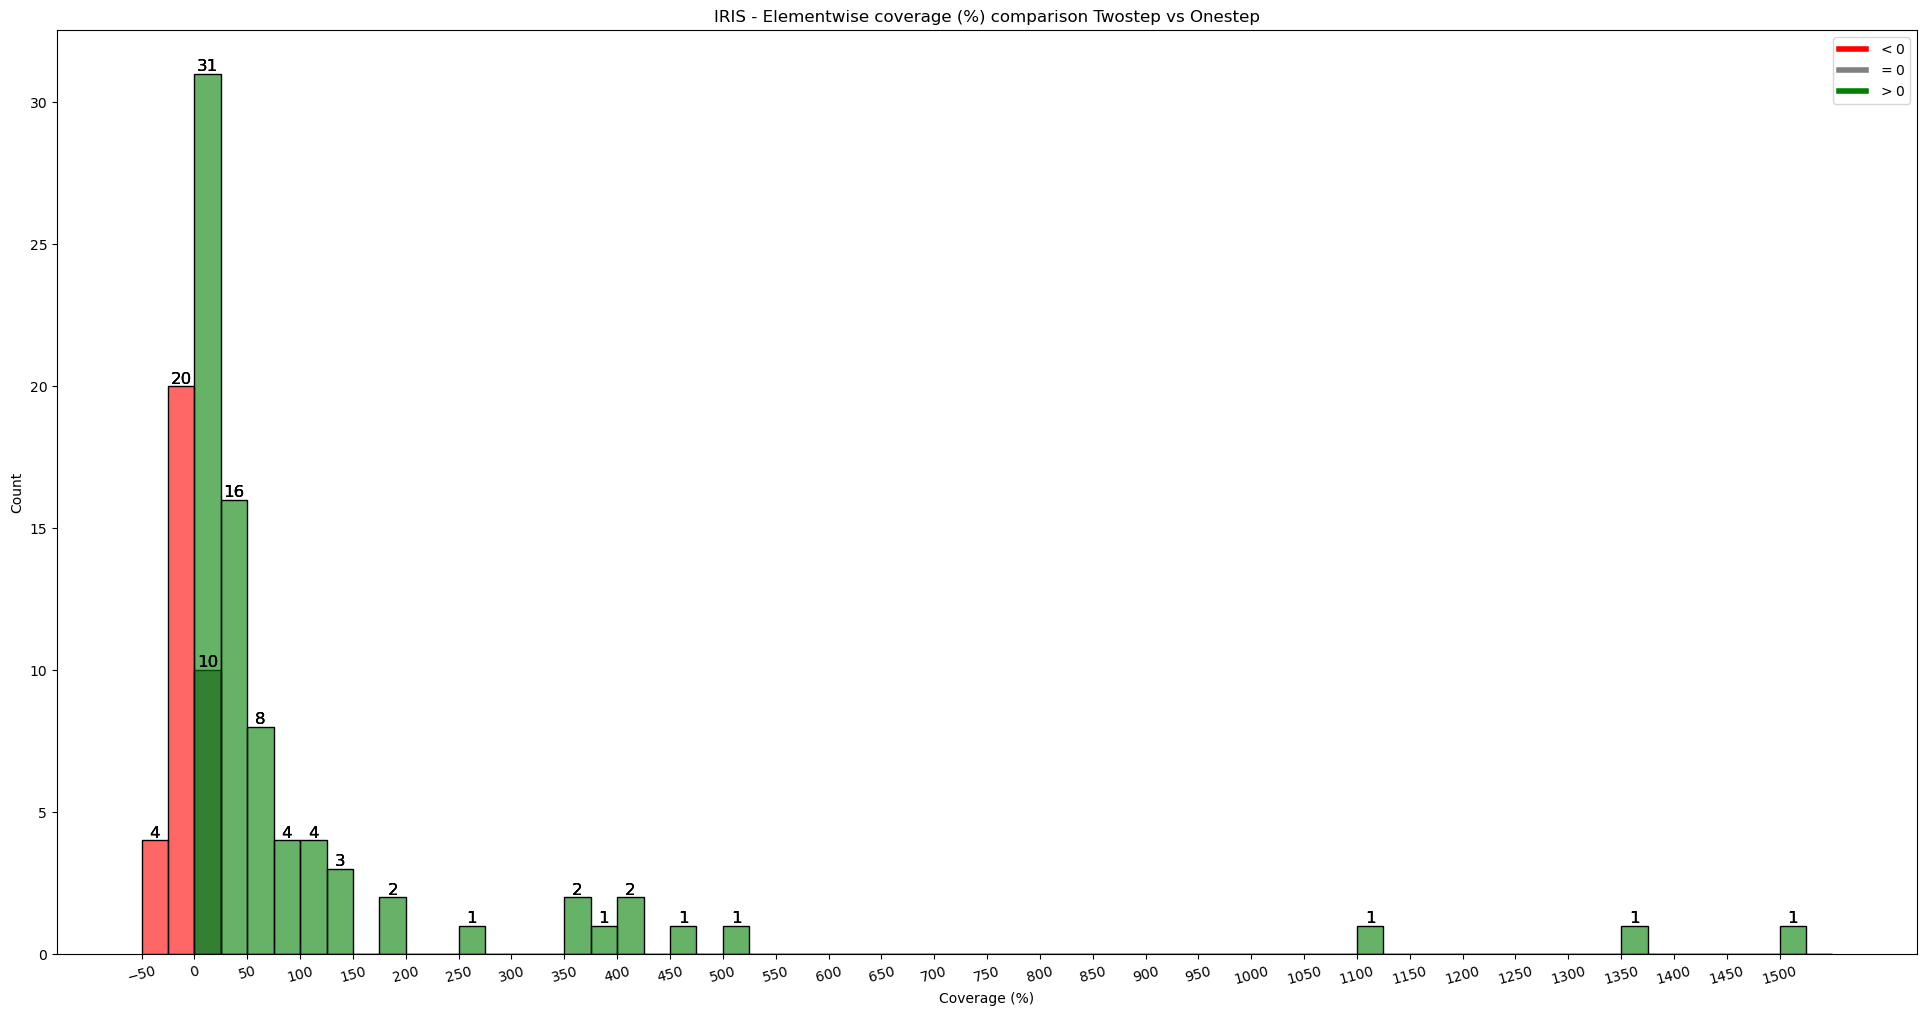

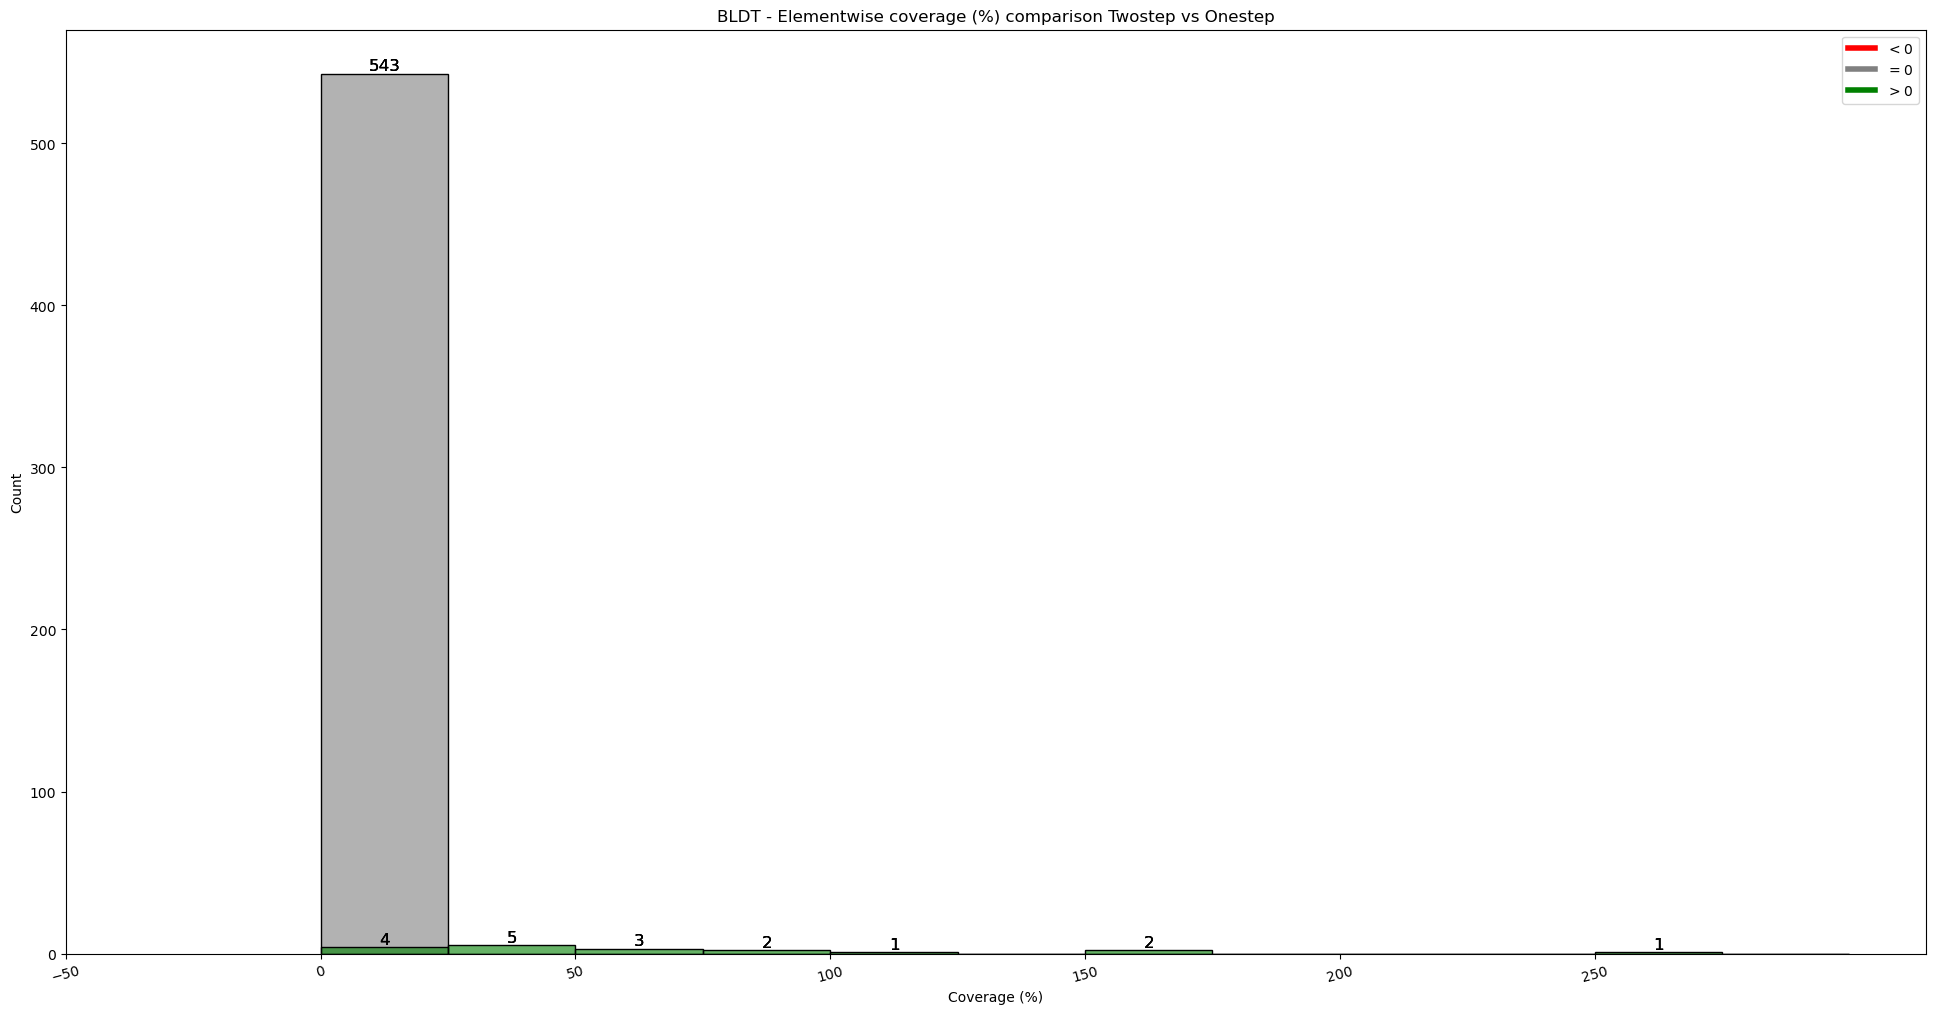

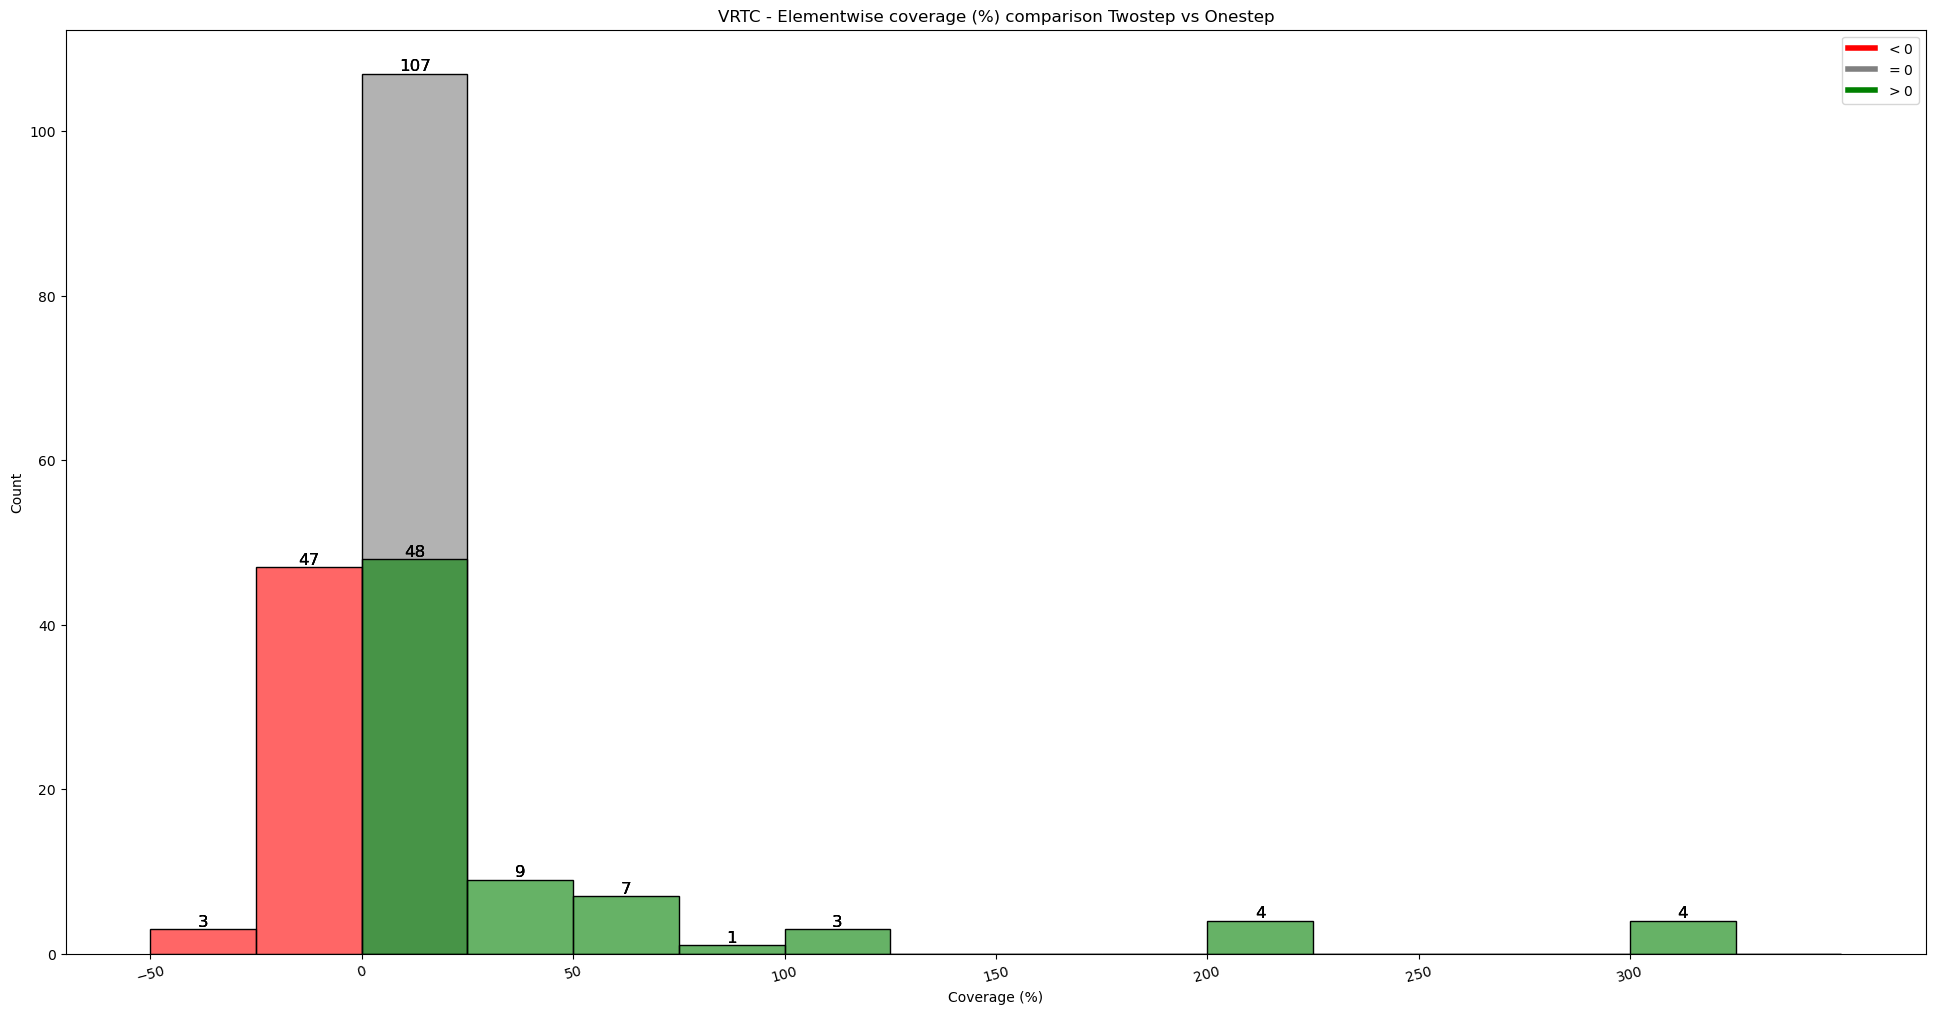

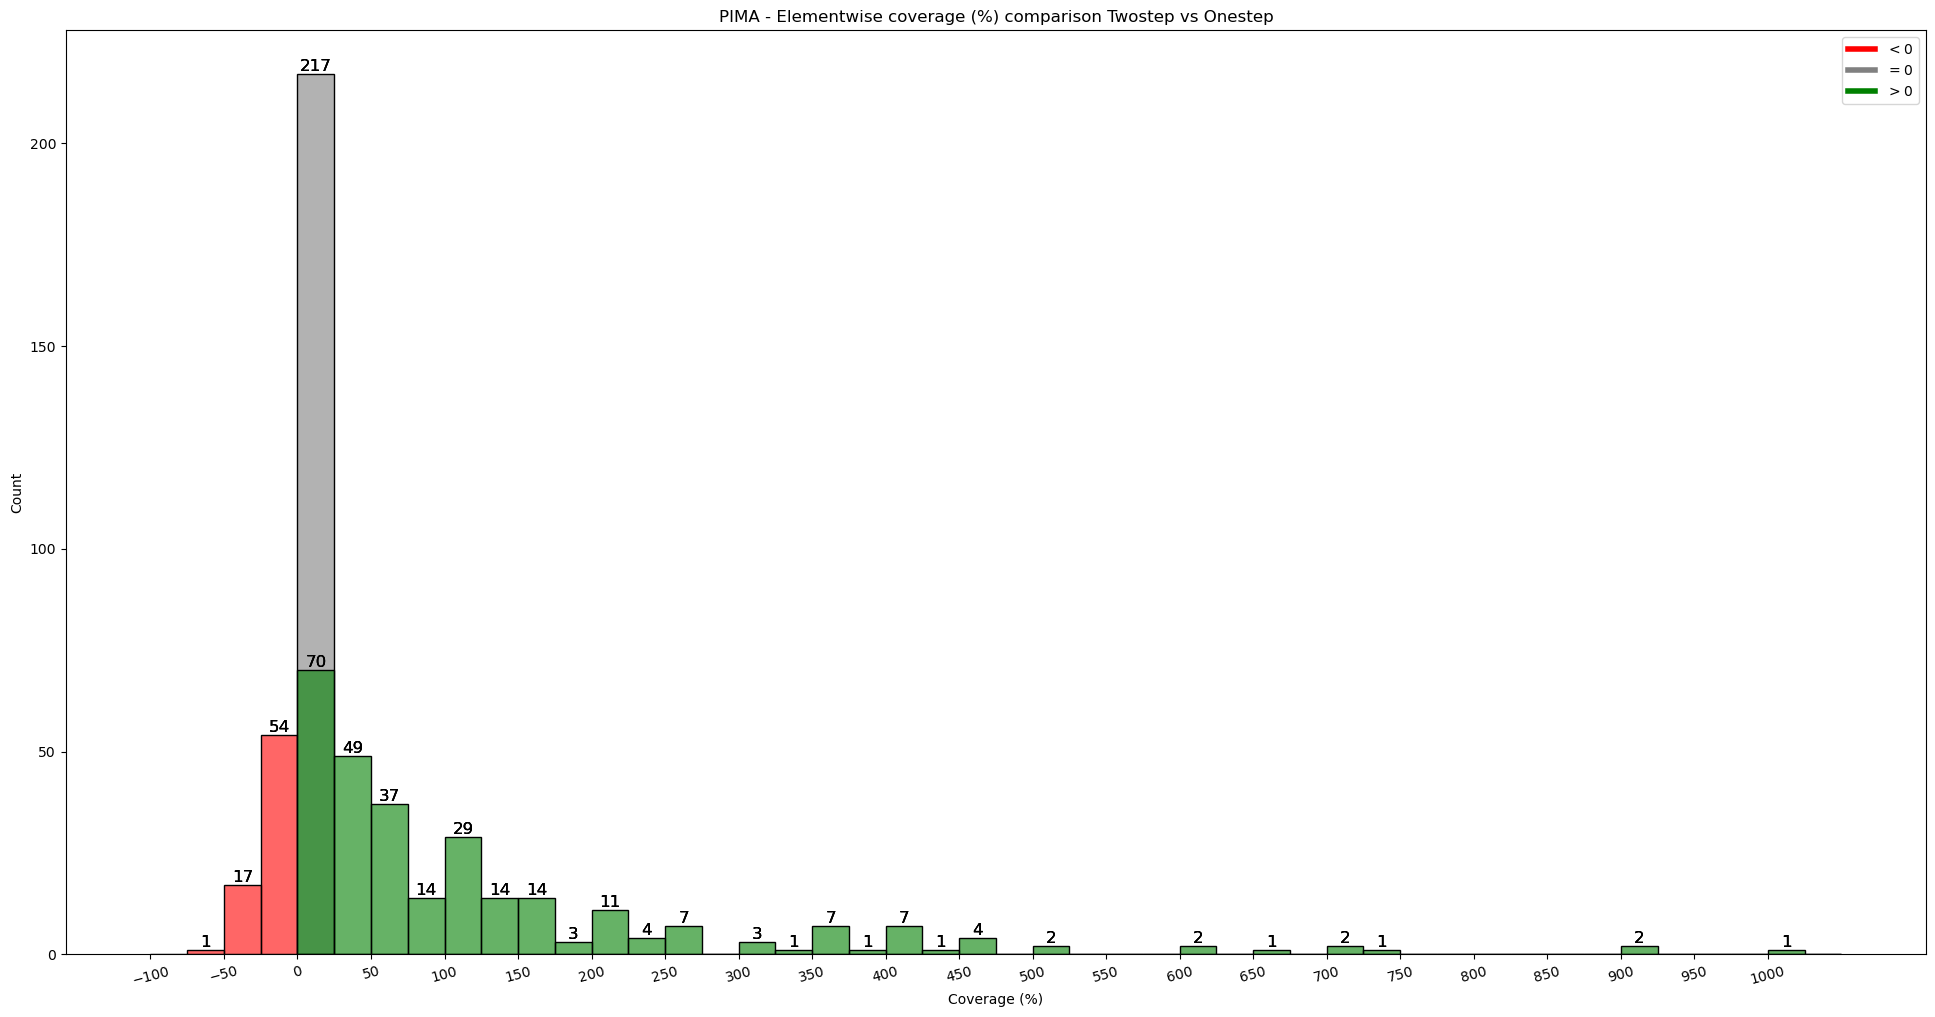

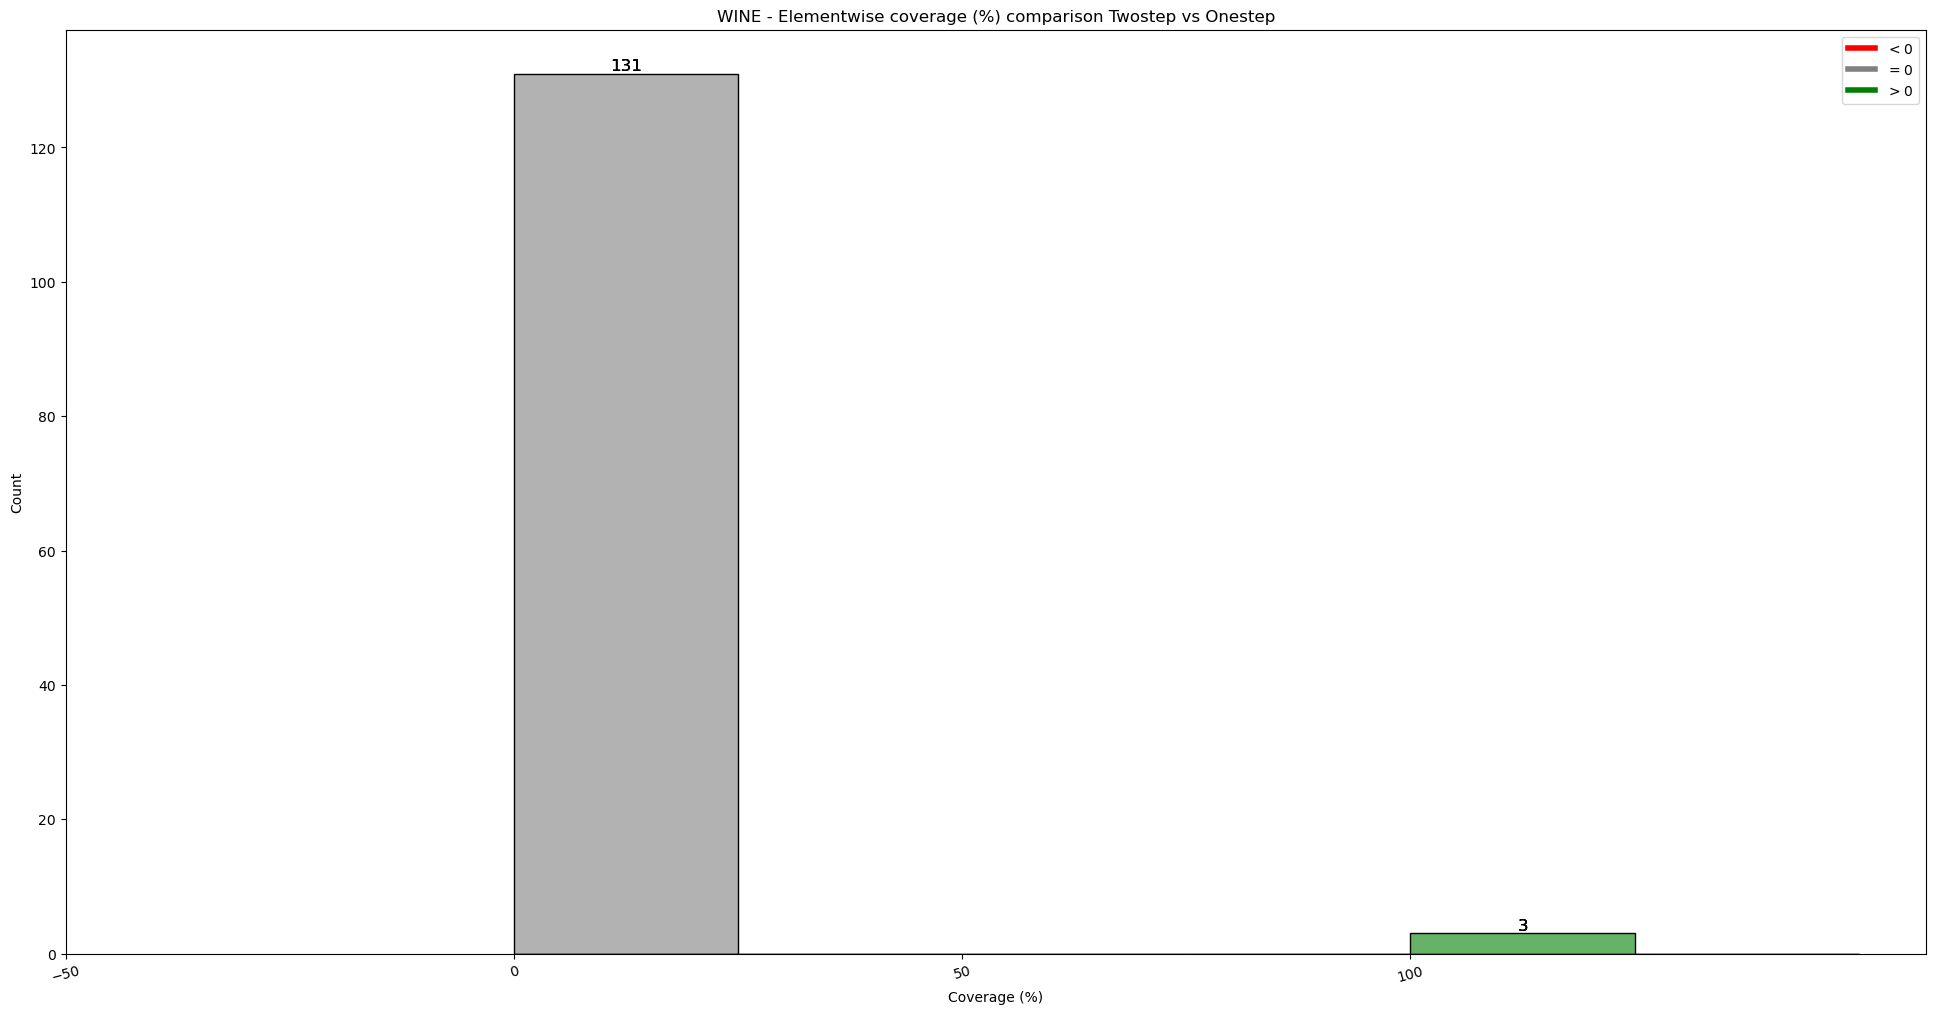

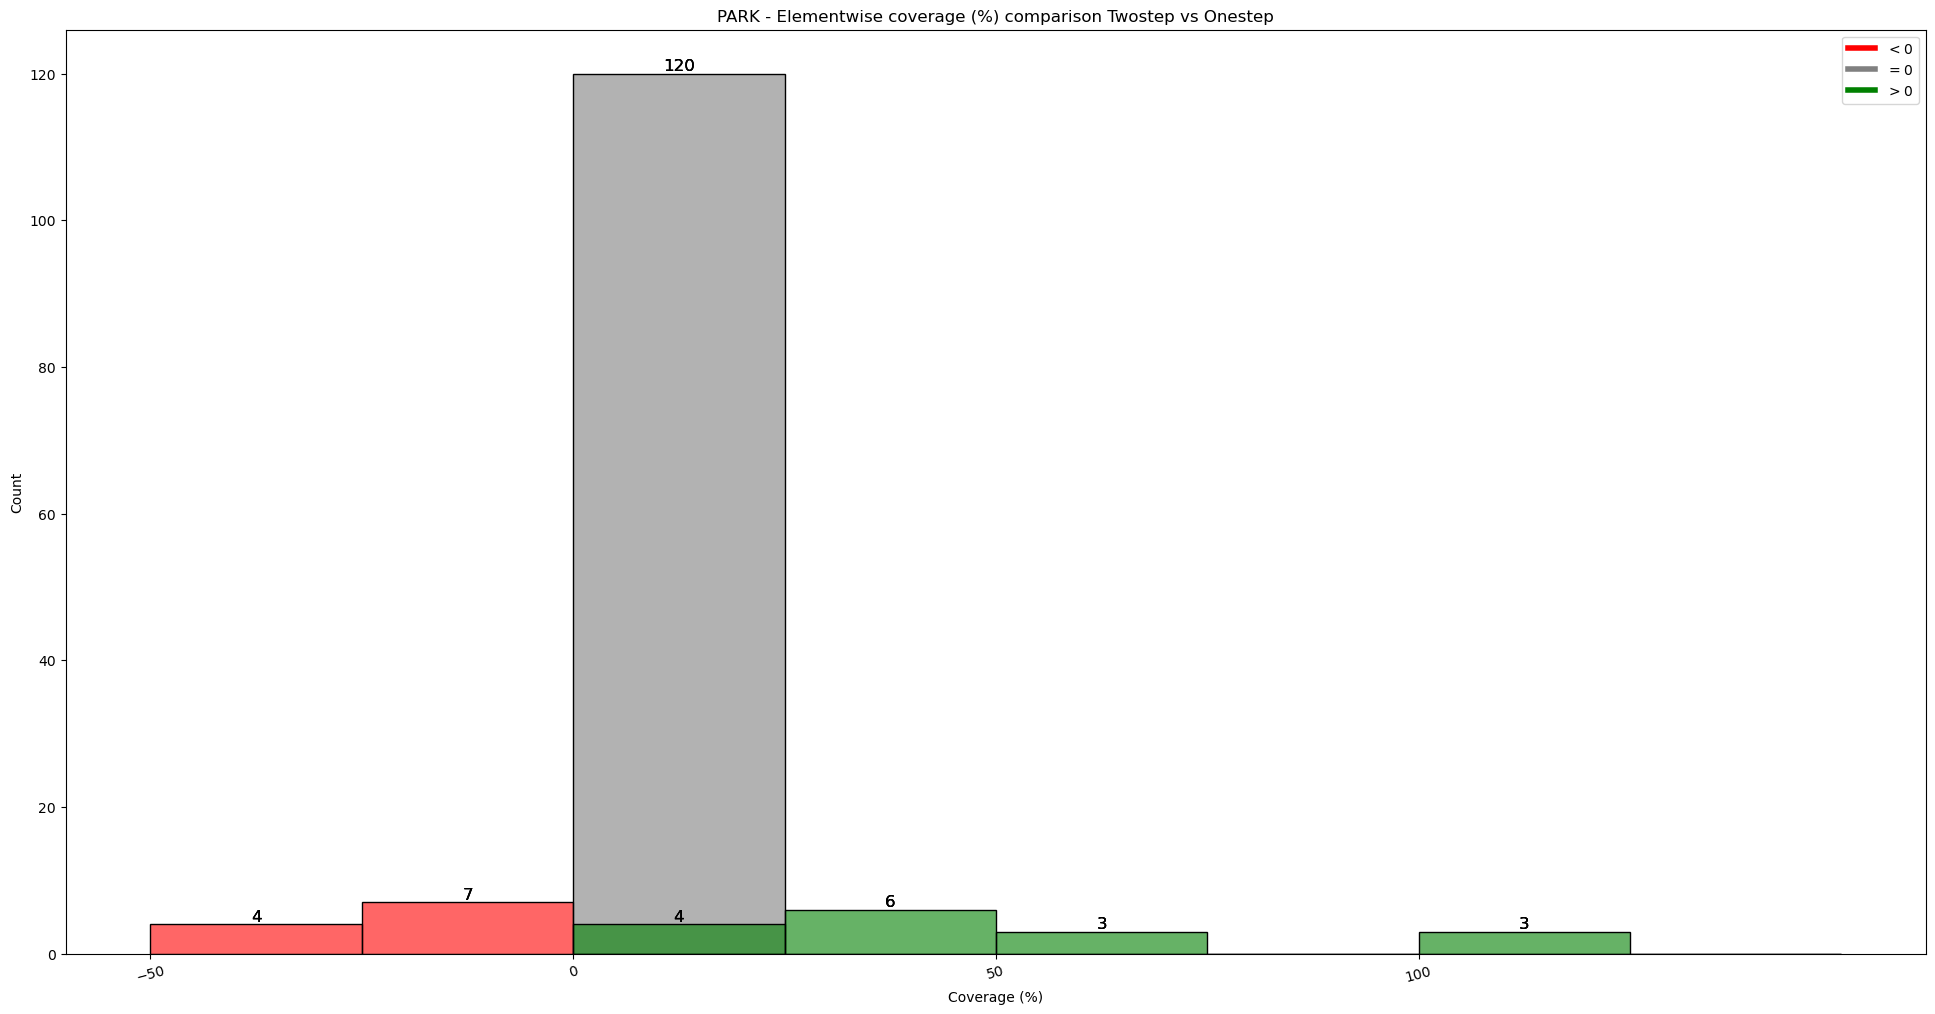

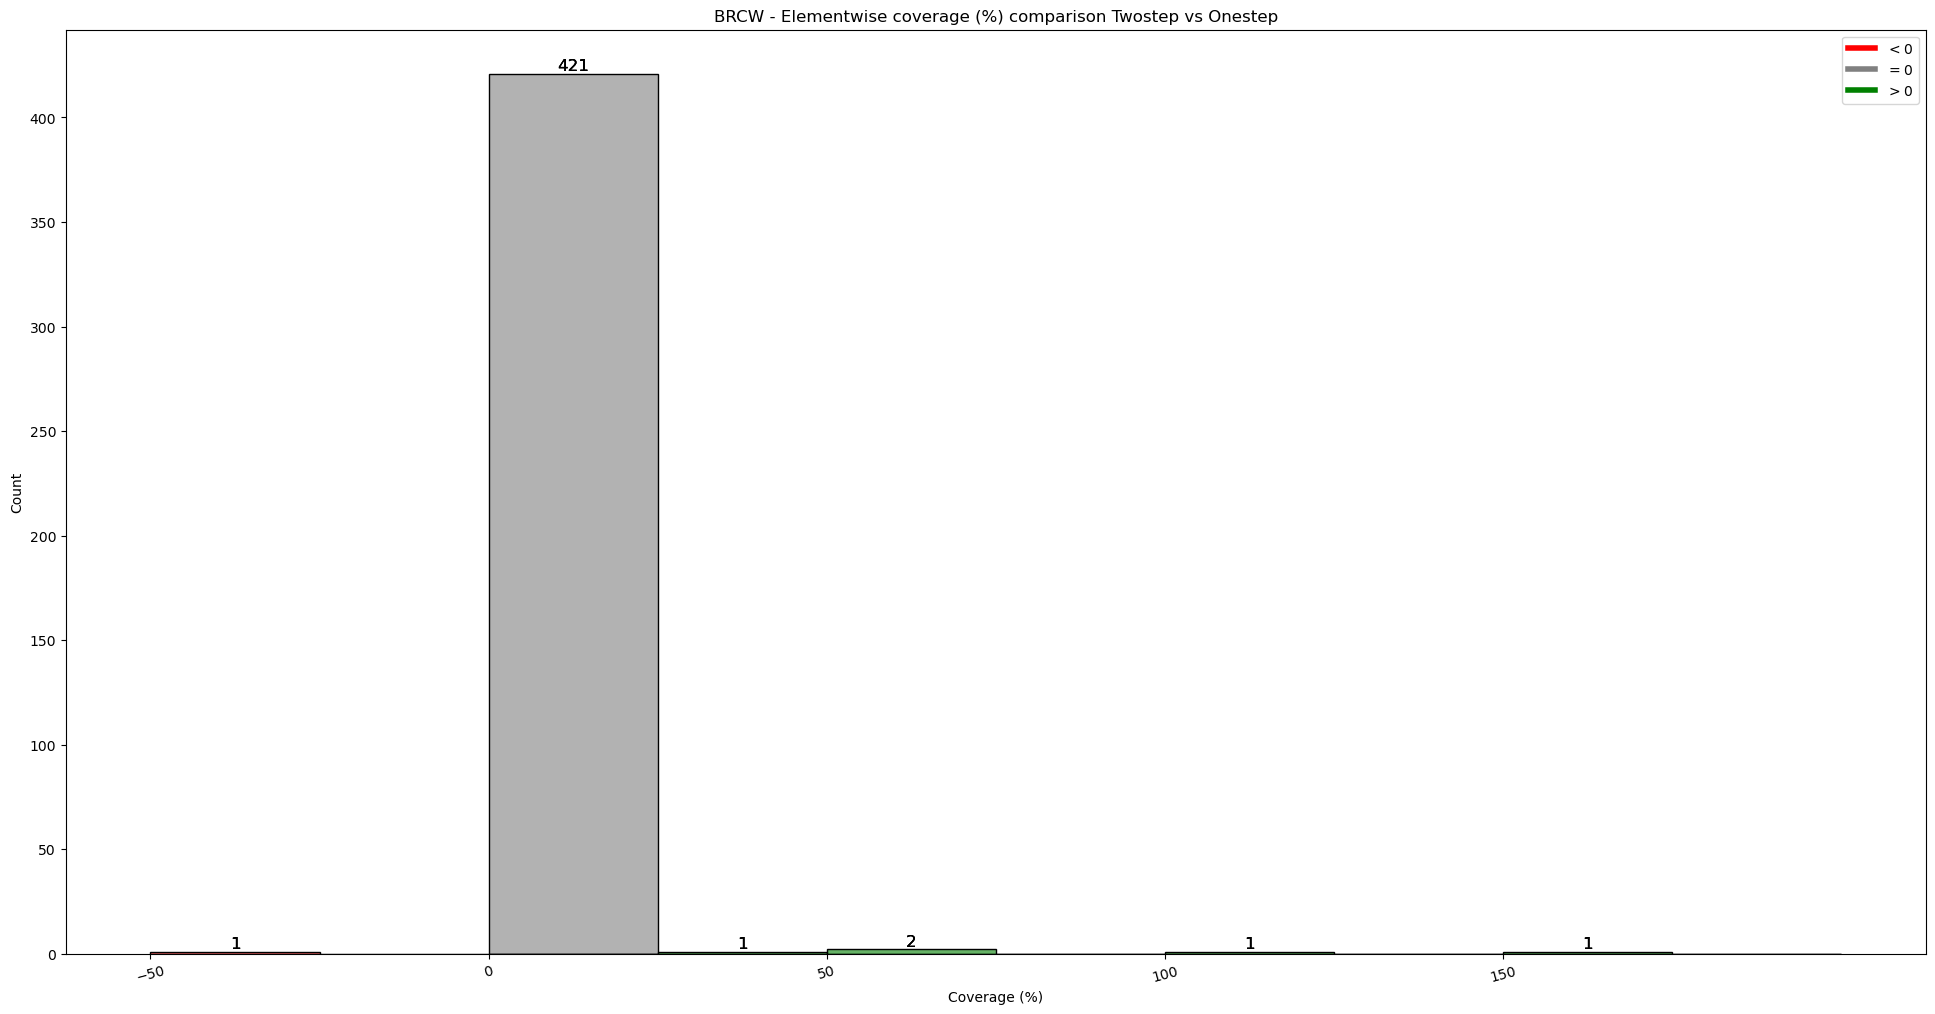

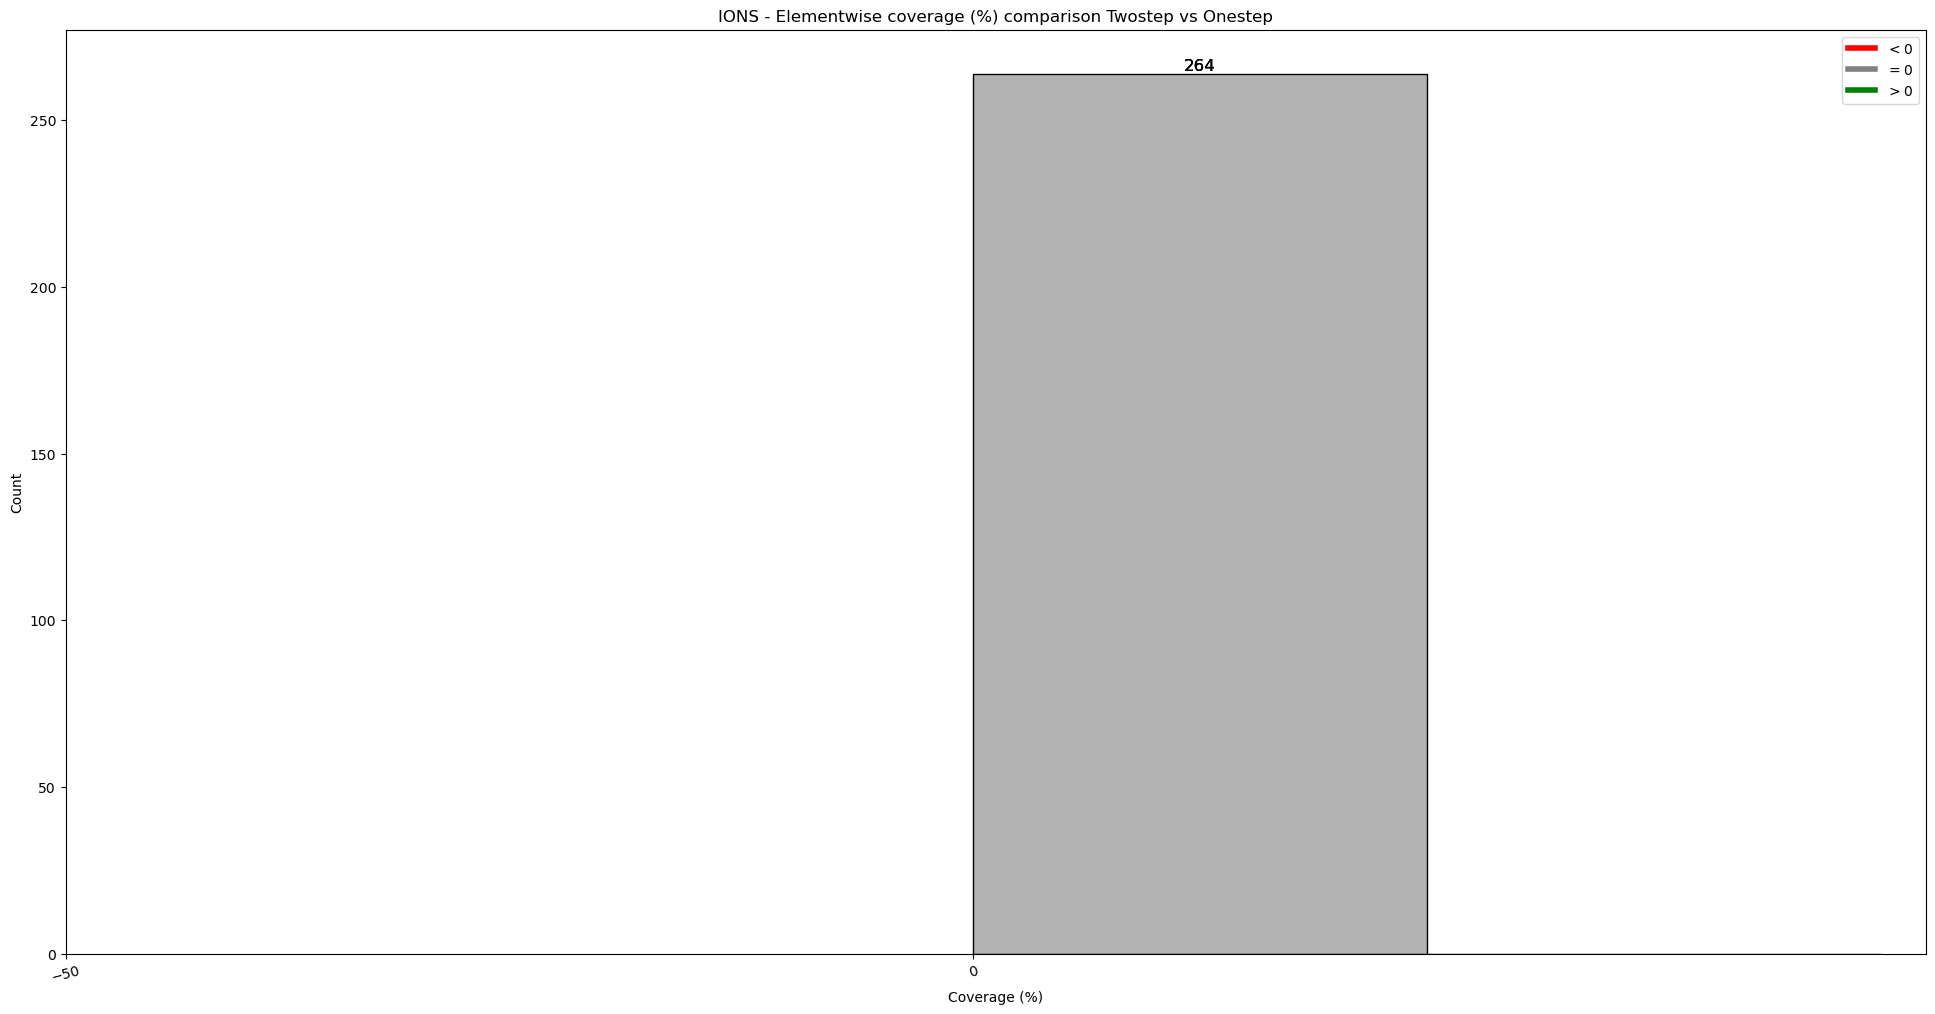

In [62]:
for i,dataset in enumerate(results_list):
    path = dataset+ '/raw_metric_data_0.25.csv'
    df = pd.read_csv(path)
    relative_proportion = np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan)
    values_lt_0 = relative_proportion[relative_proportion < 0]
    values_eq_0 = relative_proportion[relative_proportion == 0]
    values_gt_0 = relative_proportion[relative_proportion > 0]
    
    # Define bin width and edges
    bin_width = 25
    min_value = -50 if np.nanmin(relative_proportion) >= -50 else np.ceil(np.nanmin(relative_proportion) / -50) * -50
    #print(np.nanmin(relative_proportion), min_value,np.floor(min_value / -50))
    max_value = np.nanmax(relative_proportion) + bin_width
    
    bin_edges_lt_0 = np.arange(min_value, bin_width+1, bin_width)  # Bins for < 0 values
    bin_edges_gt_0 = np.arange(0, max_value+1+bin_width, bin_width)  # Bins for > 0 values
    
    # Create figure
    plt.figure(figsize=(24, 12))
    
    # Plot histograms separately
    ax_lt_0 = sns.histplot(values_lt_0, bins=bin_edges_lt_0, kde=False, color='red', alpha=0.6, label=r'$ < 0$')
    if len(values_eq_0) > len(values_gt_0[values_gt_0<bin_width]):    
        ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=0.6, label=r'$ = 0$')
    else:
        ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=1, label=r'$ = 0$')
    ax_gt_0 = sns.histplot(values_gt_0, bins=bin_edges_gt_0, kde=False, color='green', alpha=0.6, label=r'$ > 0$')
        
    
    # Add numbers above each bin
    for ax in [ax_lt_0, ax_eq_0, ax_gt_0]:
        for patch in ax.patches:
            height = patch.get_height()
            if height > 0:
                plt.text(
                    patch.get_x() + patch.get_width() / 2,  # Centered in bin
                    height,  # Position above the bar
                    f'{int(height)}',  # Rounded count
                    ha='center', va='bottom', fontsize=12
                )
    
    # Adjust xticks
    xticks = np.arange(min_value, max_value, 50)
    plt.xticks(xticks, rotation=15)
    
    # Labels and title
    plt.ylabel('Count')
    plt.xlabel('Coverage (%)')
    plt.title(f'{dataset_list[i]} Artificial - Elementwise coverage (%) comparison Twostep vs Onestep')
    
    # Correct legend
    plt.legend(
        labels=[r'$ < 0$', r'$ = 0$', r'$ > 0$'],  
        handles=[
            plt.Line2D([0], [0], color='red', lw=4),
            plt.Line2D([0], [0], color='gray', lw=4),
            plt.Line2D([0], [0], color='green', lw=4)
        ]
    )
    plt.title(f'{dataset_list[i]} - Elementwise coverage (%) comparison Twostep vs Onestep')
    plt.savefig(f"relative_coverage/{dataset_list[i]}_coverage_0.25.jpg", format='jpg', dpi=300, bbox_inches='tight')

    plt.show()

In [55]:
# for i,dataset in enumerate(results_list):
#     path = dataset+ '/raw_metric_data_0.25.csv'
#     df = pd.read_csv(path)
#     relative_proportion = np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan)
#     relative_proportion[relative_proportion == 0] -= 1e-10
#     plt.figure(figsize=(24, 12))
#     min_value = -50
#     # Definindo os bins
#     bin_edges = np.concatenate((np.arange(min_value, 1e-10, 25), np.arange(25, relative_proportion.max()+25, 25)))
    
#     # Criando o histograma
#     ax = sns.histplot(relative_proportion, bins=bin_edges, kde=False)
    
#     # Colorindo os bins e adicionando rótulos acima de cada barra
#     for patch in ax.patches:
#         height = patch.get_height()
#         if patch.get_x() + patch.get_width() <= 0:
#             patch.set_facecolor((1, 0, 0, 0.6))  # Vermelho com 50% de transparência
#         else:
#             patch.set_facecolor((0, 0.7, 0, 0.6))  # Verde com 50% de transparência
    
#         # Adicionando o número acima do bin (somente se a altura for maior que 0)
#         if height > 0:
#             plt.text(patch.get_x() + patch.get_width() / 2,  # Centralizado no bin
#                      height,  # Acima da barra
#                      f'{int(height)}',  # Número arredondado
#                      ha='center', va='bottom', fontsize=10)
    
#     # Adicionando legenda com LaTeX
#     plt.legend(
#         labels=[r'$ \leq 0$', r'$ > 0$'],  
#         handles=[
#             plt.Line2D([0], [0], color=(1, 0, 0, 0.6), lw=4), 
#             plt.Line2D([0], [0], color=(0, 0.7, 0, 0.6), lw=4)
#         ],  
#     )
    
#     # Ajustando os xticks para melhor legibilidade
#     xticks = np.arange(min_value, relative_proportion.max() + 100, 50)
#     plt.xticks(xticks, rotation=15)
    
#     plt.ylabel('Count')
#     plt.xlabel('Coverage (%)')
#     plt.title(f'{dataset_list[i]} - Elementwise coverage (%) comparison Twostep vs Onestep')
#     plt.show()

0 264 0
0.0 -50 1.0


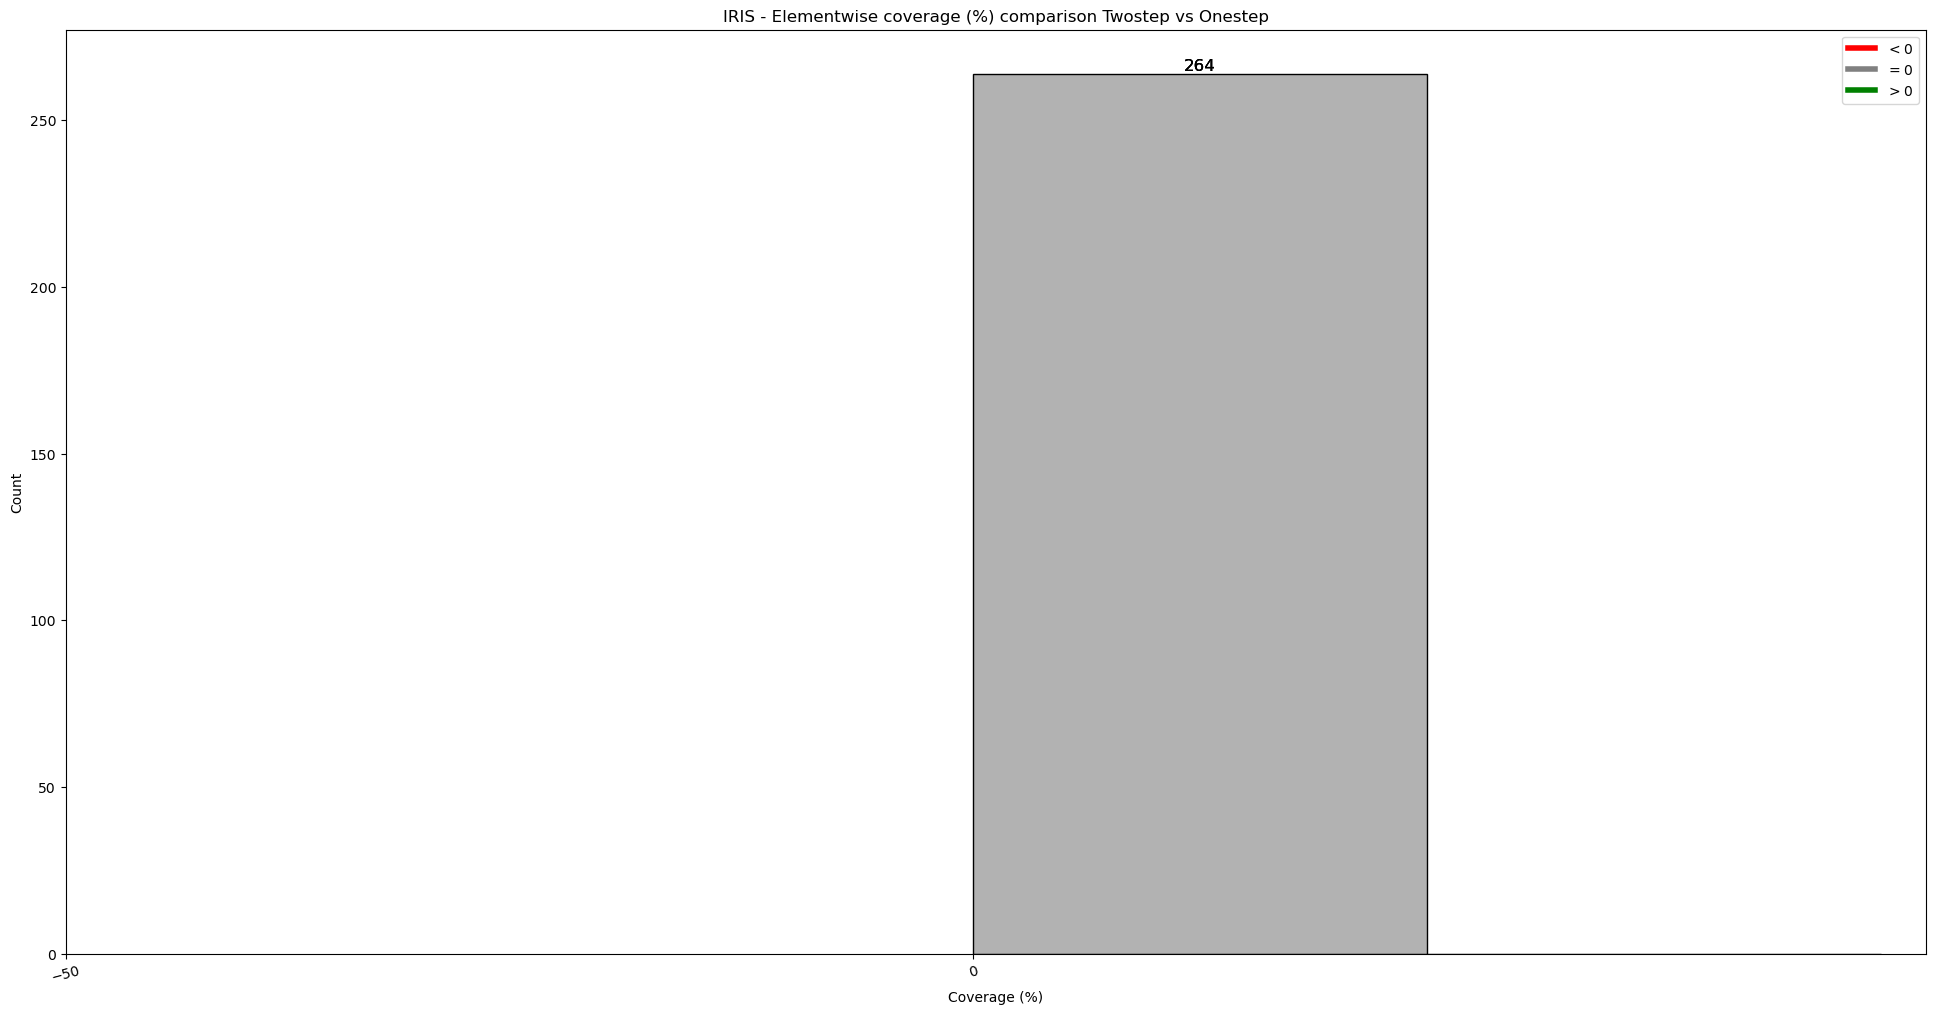

In [45]:
# for i,dataset in enumerate(['Ionosphere_results']):
#     path = dataset+ '/raw_metric_data_0.25.csv'
#     df = pd.read_csv(path)
#     relative_proportion = np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan)
#     values_lt_0 = relative_proportion[relative_proportion < 0]
#     values_eq_0 = relative_proportion[relative_proportion == 0]
#     values_gt_0 = relative_proportion[relative_proportion > 0]
#     print(len(values_lt_0),len(values_eq_0),len(values_gt_0))
    
#     # Define bin width and edges
#     bin_width = 25
#     min_value = -50 if np.nanmin(relative_proportion) >= -50 else np.ceil(np.nanmin(relative_proportion) / -50) * -50
#     print(np.nanmin(relative_proportion), min_value,np.floor(min_value / -50))
#     max_value = np.nanmax(relative_proportion) + bin_width
    
#     bin_edges_lt_0 = np.arange(min_value, bin_width+1, bin_width)  # Bins for < 0 values
#     bin_edges_gt_0 = np.arange(0, max_value+1+bin_width, bin_width)  # Bins for > 0 values
    
#     # Create figure
#     plt.figure(figsize=(24, 12))
    
#     # Plot histograms separately
#     ax_lt_0 = sns.histplot(values_lt_0, bins=bin_edges_lt_0, kde=False, color='red', alpha=0.6, label=r'$ < 0$')
#     if len(values_eq_0) > len(values_gt_0[values_gt_0<bin_width]):
        
#         ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=0.6, label=r'$ = 0$')
#         ax_gt_0 = sns.histplot(values_gt_0, bins=bin_edges_gt_0, kde=False, color='green', alpha=1, label=r'$ > 0$')
        
#     else:
#         ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=0.6, label=r'$ = 0$')
#         ax_gt_0 = sns.histplot(values_gt_0, bins=bin_edges_gt_0, kde=False, color='green', alpha=0.6, label=r'$ > 0$')
    
#     # Add numbers above each bin
#     for ax in [ax_lt_0, ax_eq_0, ax_gt_0]:
#         for patch in ax.patches:
#             height = patch.get_height()
#             if height > 0:
#                 plt.text(
#                     patch.get_x() + patch.get_width() / 2,  # Centered in bin
#                     height,  # Position above the bar
#                     f'{int(height)}',  # Rounded count
#                     ha='center', va='bottom', fontsize=12
#                 )
    
#     # Adjust xticks
#     xticks = np.arange(min_value, max_value, 50)
#     plt.xticks(xticks, rotation=15)
    
#     # Labels and title
#     plt.ylabel('Count')
#     plt.xlabel('Coverage (%)')
#     plt.title(f'{dataset_list[i]} Artificial - Elementwise coverage (%) comparison Twostep vs Onestep')
    
#     # Correct legend
#     plt.legend(
#         labels=[r'$ < 0$', r'$ = 0$', r'$ > 0$'],  
#         handles=[
#             plt.Line2D([0], [0], color='red', lw=4),
#             plt.Line2D([0], [0], color='gray', lw=4),
#             plt.Line2D([0], [0], color='green', lw=4)
#         ]
#     )
#     plt.title(f'{dataset_list[i]} - Elementwise coverage (%) comparison Twostep vs Onestep')
#     plt.show()